In [2]:
from modules import read_and_write
from modules import utility
from modules import global_variables
from modules import timeseries_and_histograms
%matplotlib widget
%load_ext autoreload
%autoreload 2


In [ ]:
#folders = utility.list_all_folders(global_variables.data_path_su4,"")
folders = utility.list_all_folders(global_variables.data_path_surface_abs,"")
#folders = utility.list_all_folders("../data/test/","")

../data/output-su4/24-24-36-6-output-twist-0 , index: 0
../data/output-su4/correlation_time , index: 1
../data/output-su4/correlation_time/output_twist_0_18_18_28 , index: 2
../data/output-su4/correlation_time/output_twist_0_32_32_48 , index: 3
../data/output-su4/correlation_time/output_twist_1 , index: 4
../data/output-su4/correlation_time/output_twist_1_18_18_28 , index: 5
../data/output-su4/correlation_time/output_twist_1_32_32_48 , index: 6
../data/output-su4/output_su4 , index: 7
../data/output-su4/output_su4/output_twist_new , index: 8
../data/output-su4/su4_autocorrelation , index: 9
../data/output-su4/su4_autocorrelation/beta-10.79688-twist-1-vol-44-44-64-6 , index: 10
../data/output-su4/su4_autocorrelation/beta-10.79688-twist-1-vol-44-44-64-6-initial-0001 , index: 11
../data/output-su4/su4_autocorrelation/beta-10.79688-twist-1-vol-44-44-64-6-initial-1 , index: 12
../data/output-su4/test_volume , index: 13
../data/output-su4/test_volume/output_twist_0 , index: 14
../data/output

In [6]:
selected_folders = folders[17:20]
#selected_folders = [folders[16],folders[17]]
#selected_folders = [folders[6],folders[11],folders[16],folders[7],folders[12],folders[17]]
for i,folder in enumerate(selected_folders):
    print(i)
    globals()[f"polyakov_{i}"] = read_and_write.load_from_folder(folder, 'polyakov:', "complex", delim=",", dim=1)
    globals()[f"plaquette_{i}"] = read_and_write.load_from_folder(folder, 'plaquette:', "real", delim="", dim=1)
    #globals()[f"abs_{i}"] = read_and_write.load_from_folder(folder, 'polyakov abs:', "real", delim=" ", dim=1)

0
Loading data from folder:  ../data/output-su4/traj_120000_combined_444464/output_twist_0
suN_10.784766666666666_3281899
Data array shape: (119997,)
First row of data: (0.768414+0.00260856j)
suN_10.766666666666666_3275483
Data array shape: (119997,)
First row of data: (0.759511-0.0013593j)
suN_11.115789473684211_3419088
Data array shape: (119997,)
First row of data: (0.838081-0.000757855j)
suN_10.983333333333333_3421925
Data array shape: (119997,)
First row of data: (0.80512+0.000602628j)
suN_10.7855_3281900
Data array shape: (119997,)
First row of data: (0.768223+0.00232509j)
suN_10.9_3421920
Data array shape: (119997,)
First row of data: (0.793983+0.00573012j)
suN_10.866666666666667_3421918
Data array shape: (119997,)
First row of data: (0.785985-0.000607915j)
suN_10.927777777777777_3428982
Data array shape: (119997,)
First row of data: (0.800725+0.00195942j)
suN_10.926315789473685_3419085
Data array shape: (119997,)
First row of data: (0.797467-0.000869653j)
suN_10.838888888888889_

In [ ]:
print(i.split[0] for i in list(plaquette_0.keys()))

AttributeError: 'list' object has no attribute 'split'

In [ ]:
index=0
timeseries_and_histograms.plot_time_series_derivative([(globals()[f"polyakov_{index}"],"polyakov"), 
                                                       (globals()[f"abs_{index}"],"abs"),
                                                       (globals()[f"plaquette_{index}"],"plaquette")],
                                                       24, 26, chosen_dict=2, thermalization=100)

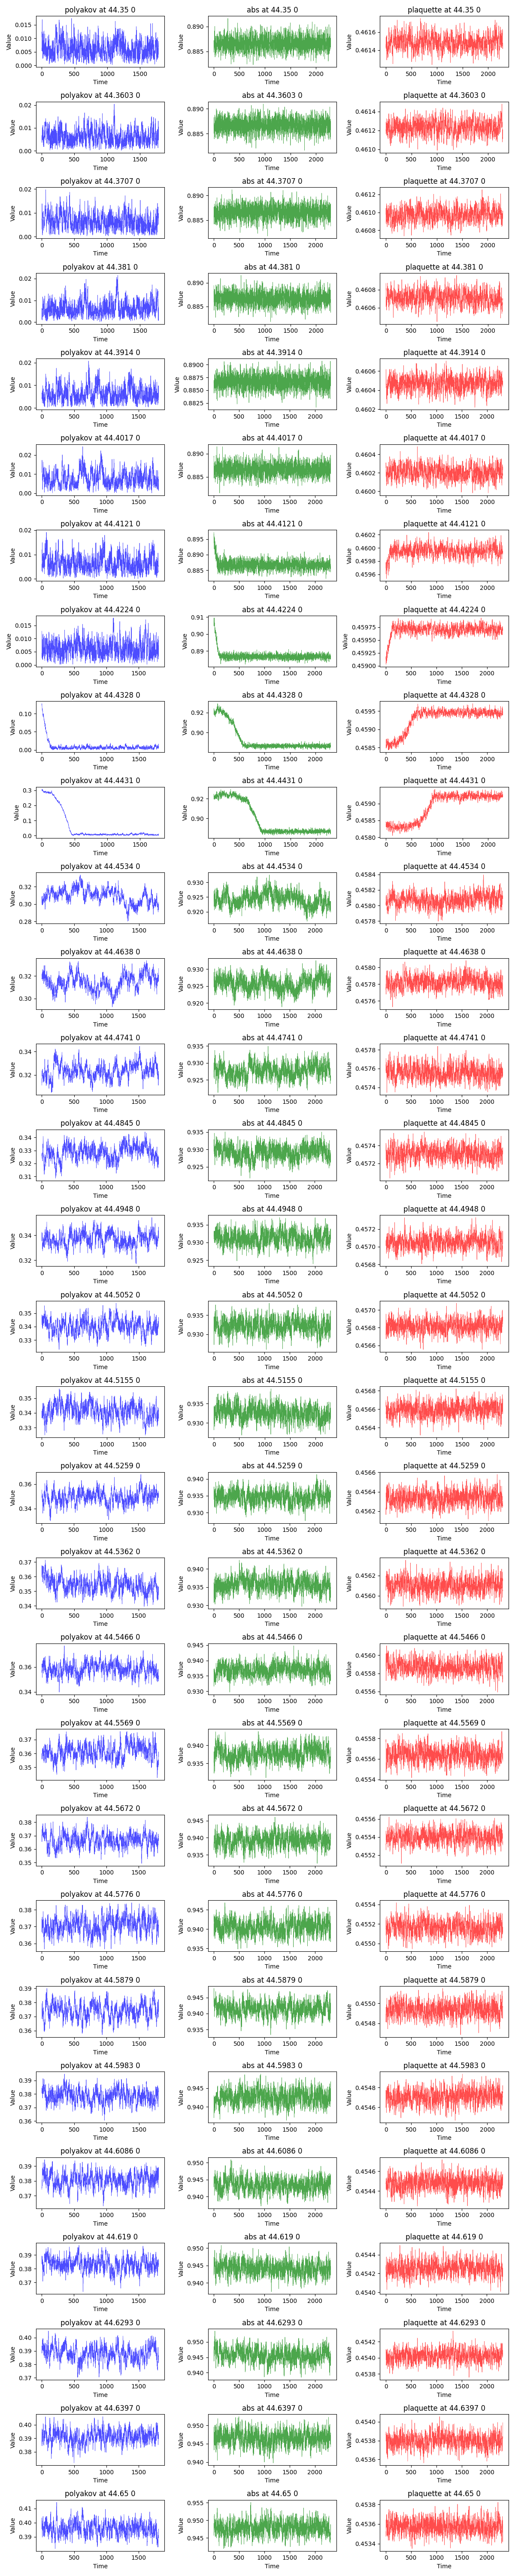

In [10]:
index = 3
timeseries_and_histograms.plot_time_series_histograms([(globals()[f"polyakov_{index}"],"polyakov"), 
                                                       (globals()[f"abs_{index}"],"abs"),
                                                       (globals()[f"plaquette_{index}"],"plaquette")], 
                                                       44, 45, hist=False, thermalization=500)

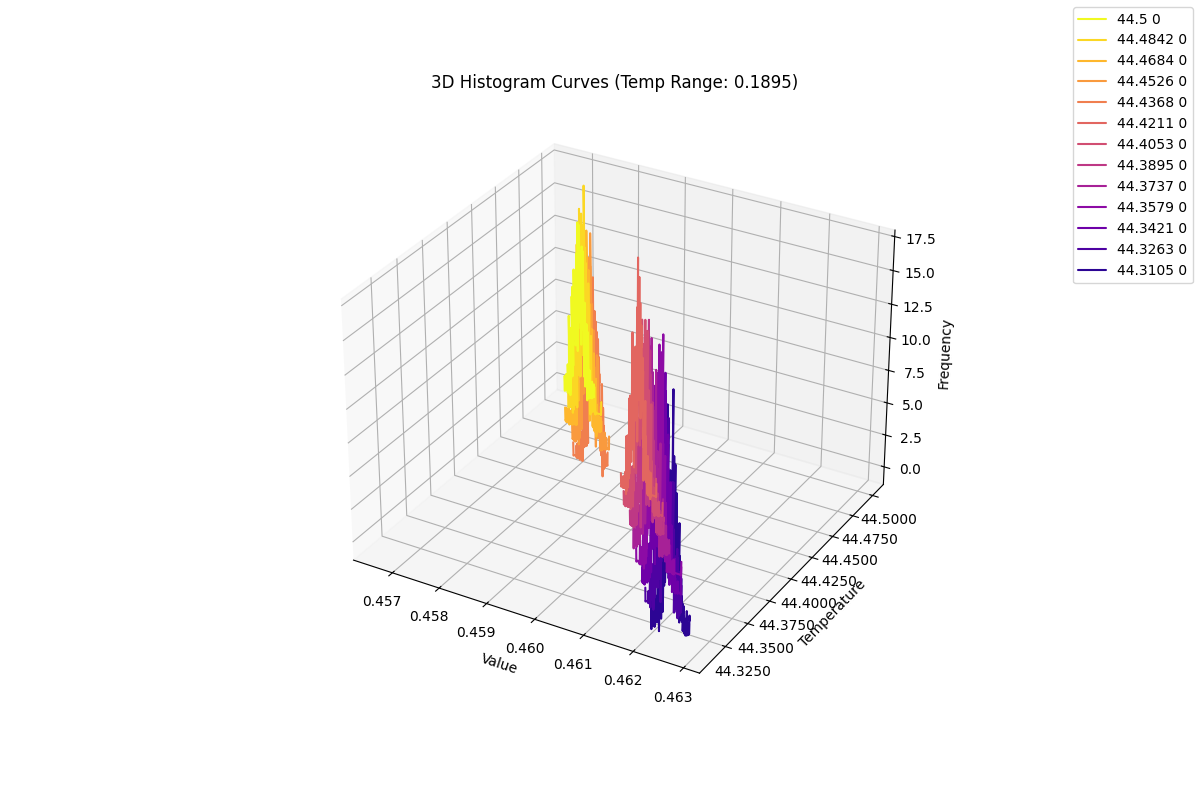

In [7]:
index = 0
#timeseries_and_histograms.plot_3d_timeseries_curves(globals()[f"plaquette_{index}"],24,25)
timeseries_and_histograms.plot_3d_histogram_curves(globals()[f"plaquette_{index}"],44.3,44.5)

In [8]:
import matplotlib.pyplot as plt

plt.close('all')

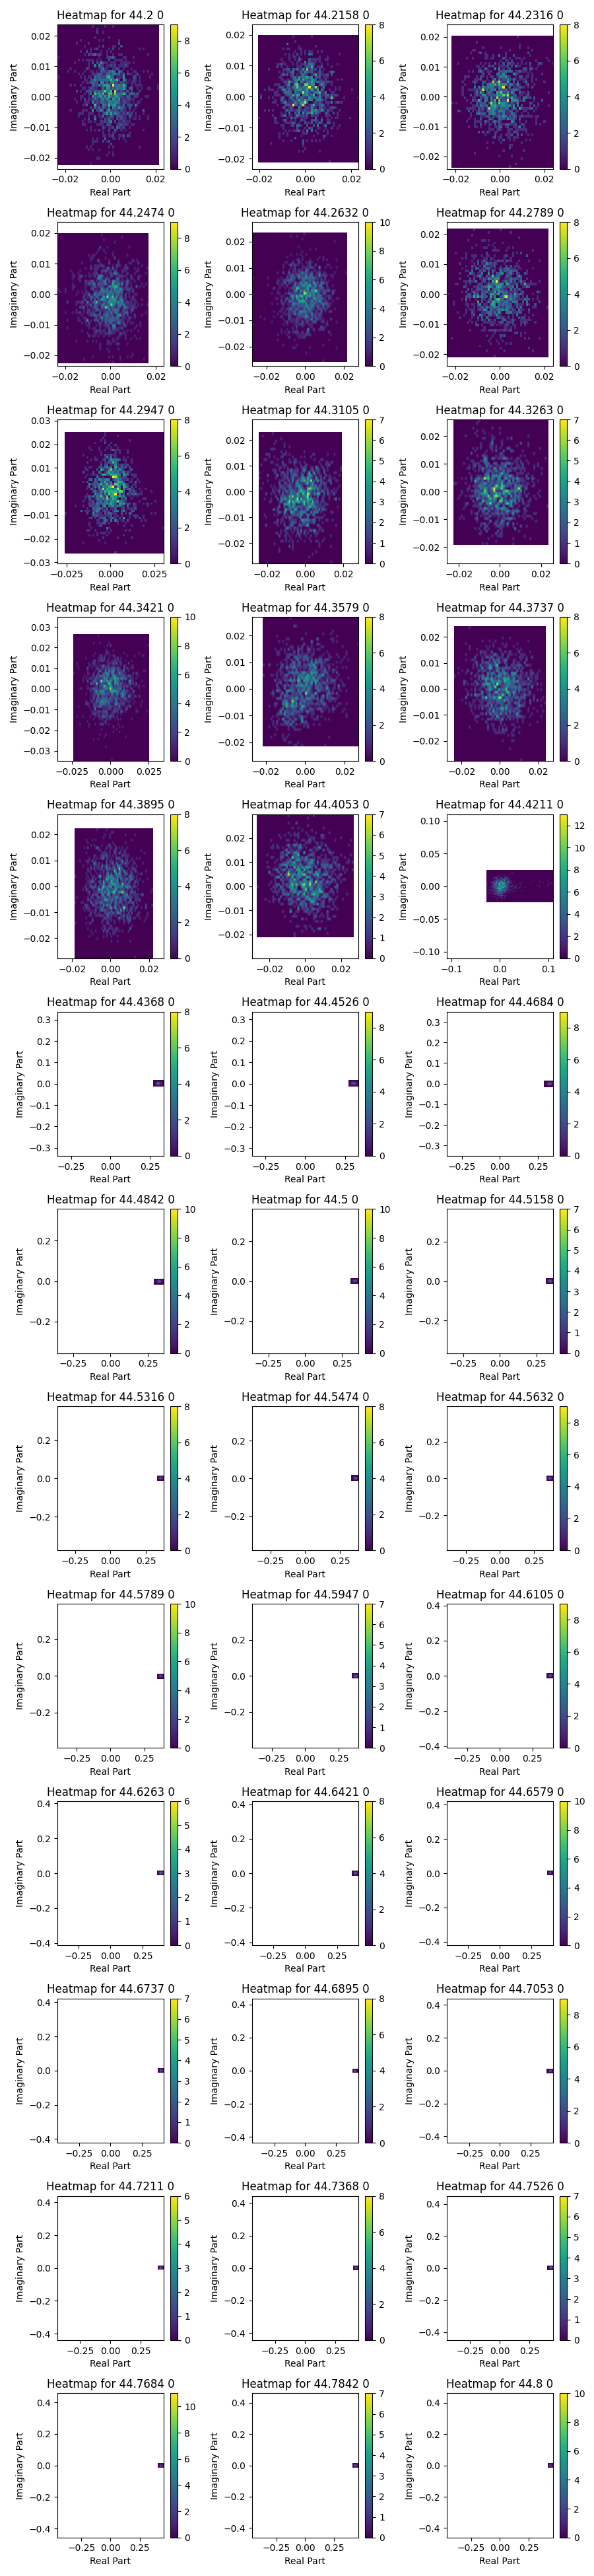

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polyakov_heatmaps(polyakov_data, columns=1,therm=500):
    # Calculate the number of rows needed
    rows = int(np.ceil(len(polyakov_data.keys()) / columns))
    
    # Create a figure with subplots
    fig, axs = plt.subplots(rows, columns, figsize=(3 * columns, 3 * rows))
    axs = axs.flatten()  # Flatten the array of axes for easy iteration
    
    # Plot each set of complex numbers in a subplot
    for i, (key, values) in enumerate(polyakov_data.items()):
        real_parts = np.real(values)[therm:]
        imag_parts = np.imag(values)[therm:]
        
        # Create a 2D histogram (heatmap)
        heatmap, xedges, yedges = np.histogram2d(real_parts, imag_parts, bins=50)
        
        # Plot the heatmap
        im = axs[i].imshow(heatmap.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', aspect='auto')
        axs[i].set_title(f'Heatmap for {key}')
        axs[i].set_xlabel('Real Part')
        axs[i].set_ylabel('Imaginary Part')
        fig.colorbar(im, ax=axs[i])
        
        # Set axis limits symmetrically around origin
        max_abs_value = max(np.max(np.abs(real_parts)), np.max(np.abs(imag_parts)))
        axs[i].set_xlim([-max_abs_value, max_abs_value])
        axs[i].set_ylim([-max_abs_value, max_abs_value])
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_polyakov_heatmaps(polyakov_0, columns=3)

In [4]:
beta = [ float(x.split(" ")[0]) for x in list(plaquette_0.keys())]

In [19]:
import numpy as np
for x in np.linspace(25.83,25.87,5):
    print(x)

25.83
25.84
25.85
25.86
25.87


In [ ]:
for i in x+y:
    print(i)